In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


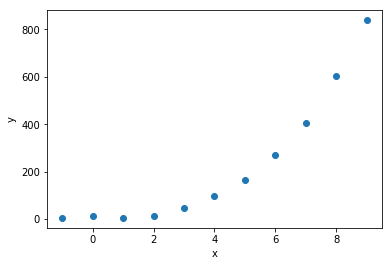

In [53]:
def polynimial(L1):
    return lambda x: sum([i*x**ind for ind,i in enumerate(L1)])

p2 = polynimial([1,1,1,1])

X = np.arange(-1,10,1).reshape(-1,1)
y = p2(X).reshape(-1,1) + np.random.random(X.shape)*2.0e1

plt.plot(X,y,'o')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [74]:
# split data to training and test test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_ = poly.fit_transform(X_train.reshape(-1,1))
X_test_ = poly.fit_transform(X_test.reshape(-1,1))


reg = linear_model.LinearRegression()
reg.fit(X_train_, y_train)
y_pred_train = reg.predict(X_train_)
y_pred_test = reg.predict(X_test_)

print('Score: {:.2f}'.format(r2_score(y_test, y_pred_test)))

adj = 1 - float(len(y)-1)/(len(y)-len(reg.coef_)-1)*(1 - r2_score(y_test,y_pred_test))

print('Adjusted Score: {:.2f}'.format(adj))

reg.coef_

Score: 0.99
Adjusted Score: 0.99


array([[  0.        , -11.31669033,   5.69670308,   0.5568796 ]])

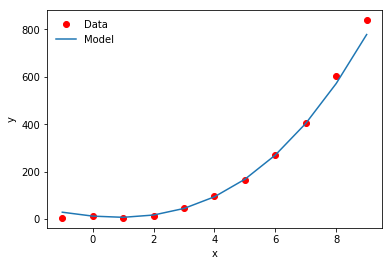

In [75]:
# plot
plt.plot(X,y,'ro',label='Data')

X_ = poly.fit_transform(X)
y_ = reg.predict(X_)

plt.plot(X,y_,label='Model')
plt.legend(frameon=0)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

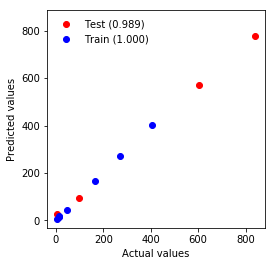

In [76]:
# plot
plt.plot(y_test,y_pred_test,'ro',label='Test ({:.3f})'.format(r2_score(y_test,y_pred_test)))
plt.plot(y_train,y_pred_train,'bo',label='Train ({:.3f})'.format(r2_score(y_train,y_pred_train)))
plt.legend(frameon=0,loc=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.axis('square')
plt.show()
